# Import

In [30]:
import pandas as pd
import numpy as np

#Importieren der Bibliothek PyTree zum Trainieren eines Decision Tree
from PyTree import ClassificationTree as ct

#Importieren der  Bibliotheken plotly und cufflinks zur Datenvisalisierung 
import plotly as py
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()


In [31]:
df_switz = pd.read_csv('switzerland.csv', sep=';')

df_switz[0:20]

,a,b,c,d,e,f,g,h
0,3001.0,0,65.0,1.0,1,1.0,1.0,NaN
1,-9.0,4,115.0,0.0,0,-9.0,-9.0,-9.0
2,0.0,-9,-9.0,0.0,1,9.0,85.0,0.0
3,1.0,1,0.0,1.0,12,8.3,-9.0,100.0
4,93.0,56,185.0,80.0,115,70.0,1.0,0.0
5,0.0,2,-9.0,-9.0,-9,-9.0,-9.0,-9.0
6,-9.0,-9,-9.0,7.0,-9,-9.0,-9.0,1.0
7,11.0,85,1.0,1.0,2,1.0,1.0,1.0
8,1.0,1,1.0,1.0,1,1.0,1.0,1.0
9,1.0,1,75.0,-9.0,name,NaN,NaN,NaN


In [32]:
df_hung = pd.read_csv('hungarian.csv', sep=';')
df_hung

,a,b,c,d,e,f,g,h
0,1254.0,0,40.0,1.0,1,0.0,0.0,NaN
1,-9.0,2,140.0,0.0,289,-9.0,-9.0,-9.0
2,0.0,-9,-9.0,0.0,12,16.0,84.0,0.0
3,0.0,0,0.0,0.0,150,18.0,-9.0,7.0
4,172.0,86,200.0,110.0,140,86.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2935,0.0,-9,13.0,12.0,-9,-9.0,-9.0,-9.0
2936,-9.0,-9,-9.0,-9.0,-9,-9.0,-9.0,8.0
2937,5.0,84,0.0,-9.0,-9,-9.0,-9.0,-9.0
2938,-9.0,-9,-9.0,1.0,1,1.0,1.0,1.0


In [33]:
df_cleve = pd.read_csv('cleveland.csv', sep=';')
df_cleve

,a,b,c,d,e,f,g,h
0,1.0,0,63,1,-9,-9.0,-9.0,NaN
1,-9.0,1,145,1,233,-9.0,50.0,20.0
2,1.0,-9,1,2,2,3.0,81.0,0.0
3,0.0,0,0,0,1,10.5,6.0,13.0
4,150.0,60,190,90,145,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2815,0.0,1,-9,55,0,-9.0,-9.0,-9.0
2816,-9.0,-9,-9,3,-9,-9.0,-9.0,5.0
2817,24.0,84,0,1,1,1.0,-9.0,1.0
2818,-9.0,1,-9,1,1,1.0,1.0,1.0


# Aufbereiten

In [34]:
def process_data(df_unpr):
    df_pr = pd.DataFrame(columns=range(1,77))
    for i in range(int(len(df_unpr)/10)):
        liste = []

        for j in range(10):
            index = i*10 + j
            if j == 0:
                for x in df_unpr.loc[index][0:7].values:
                    liste.append(x)
            elif j == 9:
                for x in df_unpr.loc[index][0:5].values:
                    liste.append(x)
            else:
                for x in df_unpr.loc[index].values:
                    liste.append(x)

        df_pr.loc[i] = liste



    df_pr.replace([-9.0, '-9'],np.nan, inplace=True)    
    #df_pr = df_pr.dropna(axis=1, how='all')
    return df_pr            

In [35]:
df_pr_hung = process_data(df_hung)
df_pr_hung

,1,2,3,4,5,6,7,8,9,10,...,67,68,69,70,71,72,73,74,75,76
0,1254.0,0,40.0,1.0,1,0.0,0.0,NaN,2,140.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
1,1255.0,0,49.0,0.0,1,0.0,0.0,NaN,3,160.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
2,1256.0,0,37.0,1.0,1,0.0,0.0,NaN,2,130.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
3,1257.0,0,48.0,0.0,1,1.0,1.0,NaN,4,138.0,...,2.0,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
4,1258.0,0,54.0,1.0,1,0.0,1.0,NaN,3,150.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053.0,0,48.0,0.0,0,0.0,0.0,NaN,2,NaN,...,NaN,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
290,1054.0,0,36.0,1.0,1,0.0,0.0,NaN,2,120.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
291,5001.0,0,48.0,1.0,0,0.0,0.0,NaN,3,110.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name
292,5000.0,0,47.0,0.0,0,0.0,0.0,NaN,2,140.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1,NaN,NaN,name


In [36]:
df_pr_hung[58].value_counts()



0.0    188
1.0     37
3.0     28
2.0     26
4.0     15
Name: 58, dtype: int64

In [37]:
df_pr_switz = process_data(df_switz)
df_pr_switz
        
    

,1,2,3,4,5,6,7,8,9,10,...,67,68,69,70,71,72,73,74,75,76
0,3001.0,0,65.0,1.0,1,1.0,1.0,NaN,4,115.0,...,1.0,1,1.0,1.0,1.0,1.0,1.0,75.0,NaN,name
1,3002.0,0,32.0,1.0,0,0.0,0.0,NaN,1,95.0,...,1.0,1,1.0,1.0,1.0,5.0,1.0,63.0,NaN,name
2,3003.0,0,61.0,1.0,1,1.0,1.0,NaN,4,105.0,...,2.0,1,1.0,1.0,1.0,1.0,1.0,67.0,NaN,name
3,3004.0,0,50.0,1.0,1,1.0,1.0,NaN,4,145.0,...,1.0,1,1.0,1.0,1.0,5.0,4.0,36.0,NaN,name
4,3005.0,0,57.0,1.0,1,1.0,1.0,NaN,4,110.0,...,2.0,1,1.0,1.0,1.0,1.0,1.0,60.0,NaN,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4070.0,0,54.0,1.0,1,1.0,1.0,NaN,4,180.0,...,1.0,1,1.0,1.0,1.0,1.0,1.0,71.0,NaN,name
119,4071.0,0,56.0,1.0,1,1.0,1.0,NaN,4,125.0,...,2.0,1,5.0,1.0,1.0,1.0,2.0,68.0,NaN,name
120,4072.0,0,56.0,1.0,0,1.0,1.0,NaN,3,125.0,...,1.0,1,1.0,1.0,5.0,3.0,2.0,61.0,NaN,name
121,4073.0,0,54.0,1.0,1,1.0,1.0,NaN,4,130.0,...,2.0,1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name


In [38]:
df_pr_cleve = process_data(df_cleve)
df_pr_cleve

,1,2,3,4,5,6,7,8,9,10,...,67,68,69,70,71,72,73,74,75,76
0,1.0,0,63,1,NaN,NaN,NaN,NaN,1,145,...,1,1,1.0,1.0,1.0,1.0,1,NaN,NaN,name
1,2.0,0,67,1,NaN,NaN,NaN,NaN,4,160,...,1,1,1.0,1.0,1.0,1.0,1,NaN,NaN,name
2,3.0,0,67,1,NaN,NaN,NaN,NaN,4,120,...,2,2,1.0,1.0,1.0,7.0,3,NaN,NaN,name
3,4.0,0,37,1,NaN,NaN,NaN,NaN,3,130,...,1,1,1.0,1.0,1.0,1.0,1,NaN,NaN,name
4,6.0,0,41,0,NaN,NaN,NaN,NaN,2,130,...,1,1,1.0,1.0,1.0,1.0,1,NaN,NaN,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,294.0,0,39,0,NaN,NaN,NaN,NaN,3,138,...,1,1,1.0,1.0,1.0,1.0,2,NaN,NaN,name
278,295.0,0,57,1,NaN,NaN,NaN,NaN,2,154,...,1,1,1.0,1.0,1.0,1.0,1,NaN,NaN,name
279,296.0,0,58,0,NaN,NaN,NaN,NaN,4,130,...,1,1,1.0,1.0,1.0,1.0,1,NaN,NaN,name
280,297.0,0,57,1,NaN,NaN,NaN,NaN,4,110,...,1,2,1.0,1.0,1.0,1.0,1,NaN,NaN,name


In [39]:
df_pr_switz.to_csv('switzerland_aufbereitet.csv', sep=';')
df_pr_cleve.to_csv('cleveland_aufbereitet.csv', sep=';')
df_pr_hung.to_csv('hungarian_aufbereitet.csv', sep=';')

# Visualisieren

In [40]:
for i in range(1,77):
    print(i,sum(df_pr_cleve[i].isnull().values))

1 0
2 0
3 0
4 0
5 282
6 282
7 282
8 282
9 0
10 0
11 0
12 0
13 282
14 5
15 5
16 0
17 259
18 0
19 0
20 0
21 0
22 0
23 2
24 2
25 2
26 2
27 2
28 0
29 0
30 69
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 282
43 0
44 2
45 282
46 282
47 282
48 282
49 282
50 282
51 2
52 282
53 282
54 282
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 282
63 0
64 282
65 0
66 282
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 282
75 282
76 0


In [41]:
df_pr_cleve[13].value_counts().sort_index()

Series([], Name: 13, dtype: int64)

In [42]:
sum(df_pr_cleve[16].isnull().values)

0

In [43]:
df_pr_cleve[14].value_counts().sort_index()

0.0     115
1.0       1
2.0       6
3.0       2
4.0       1
5.0       1
8.0       1
9.0       1
10.0     12
15.0      4
20.0     51
25.0      6
28.0      1
30.0     20
35.0      2
40.0     30
50.0      9
60.0      9
70.0      1
75.0      1
80.0      2
99.0      1
Name: 14, dtype: int64

In [44]:
(df_pr_cleve[14]>=1.0).iplot('hist')

In [45]:
(df_pr_cleve[58]>=1).iplot('hist')#.value_counts()

In [46]:
pd.crosstab(df_pr_cleve[9], df_pr_cleve[58]).iplot(kind = 'bar')

# Präparieren

In [47]:
df_pr_cleve_red1 = df_pr_cleve[[3,4,9,10,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,29,
                                30,31,32,33,34,35,36,37,38,39,40,41,43,44,51,58]]
df_pr_cleve_red1[13]=(df_pr_cleve_red1[14]>=1.0)
df_pr_cleve_red1[58]=(df_pr_cleve_red1[58]>=1.0)
df_pr_cleve_red1[12]=df_pr_cleve_red1[12].astype(int)
df_pr_cleve_red1[20]=df_pr_cleve_red1[20].astype(int)
df_pr_cleve_red1[36]=df_pr_cleve_red1[36].astype(int)
df_pr_cleve_red1[44]=df_pr_cleve_red1[44].astype(float)
#df_pr_cleve_red1.replace([True,False], ['Ja','Nein'], inplace=True)
df_pr_cleve_red1.dtypes

3       int64
4       int64
9       int64
10      int64
12      int32
13       bool
14    float64
15    float64
16    float64
18      int64
19      int64
20      int32
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
29    float64
30    float64
31    float64
32    float64
33      int64
34      int64
35      int64
36      int32
37    float64
38    float64
39    float64
40    float64
41      int64
43      int64
44    float64
51    float64
58       bool
dtype: object

In [48]:
df_pr_cleve_red1[44].value_counts()

0.0    166
1.0     61
2.0     34
3.0     19
Name: 44, dtype: int64

In [49]:
list(df_pr_cleve_red1[44].value_counts().sort_index().index)#.dtypes

[0.0, 1.0, 2.0, 3.0]

# Trainieren 1

In [50]:
tree = ct.DecisionTree(data=df_pr_cleve_red1[:200],target=58)

In [51]:
tree.grow_tree()

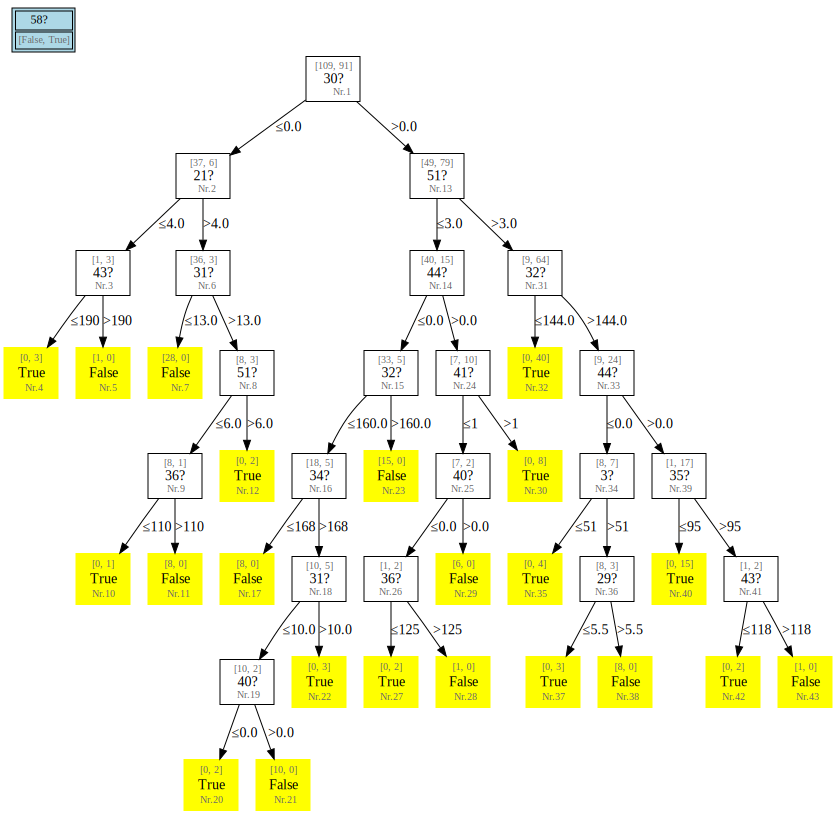

In [52]:
tree.print_tree()

In [53]:
tree.prediction_accuracy(df_pr_cleve_red1[:200])

0.96

In [54]:
tree.prediction_accuracy(df_pr_cleve_red1[200:])

0.7073170731707317

In [55]:
tree.validation_pruning(df_pr_cleve_red1[200:])

Test Node: 3
Prune Node: 3
Node-Count 41
New Test-Score 0.7073170731707317
Test Node: 9
Prune Node: 9
Node-Count 39
New Test-Score 0.7073170731707317
Test Node: 8
Prune Node: 8
Node-Count 37
New Test-Score 0.7073170731707317
Test Node: 6
Prune Node: 6
Node-Count 35
New Test-Score 0.7073170731707317
Test Node: 2
Prune Node: 2
Node-Count 33
New Test-Score 0.7073170731707317
Test Node: 19
Prune Node: 19
Node-Count 31
New Test-Score 0.7439024390243902
Test Node: 18
Prune Node: 18
Node-Count 29
New Test-Score 0.7804878048780488
Test Node: 16
Prune Node: 16
Node-Count 27
New Test-Score 0.7804878048780488
Test Node: 15
Prune Node: 15
Node-Count 25
New Test-Score 0.7804878048780488
Test Node: 26
Prune Node: 26
Node-Count 23
New Test-Score 0.7804878048780488
Test Node: 25
Test Node: 24
Prune Node: 24
Node-Count 19
New Test-Score 0.7926829268292683
Test Node: 14
Test Node: 36
Prune Node: 36
Node-Count 17
New Test-Score 0.7926829268292683
Test Node: 34
Test Node: 41
Prune Node: 41
Node-Count 15
N

In [56]:
tree2 = ct.DecisionTree(data=df_pr_cleve_red1[:200],target=58)
a=tree2.manual_split(attribute=4,doc=True)

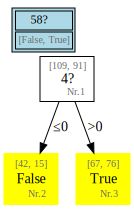

In [57]:
tree2.print_tree()

In [58]:
a[:40]

,Attribute,Threshold,Criterion
0,4.0,0.0,0.044


# Reduzieren + Aufbereiten

In [59]:
df_pr_cleve_red2 = df_pr_cleve[[3,4,9,10,12,13,14,15,16,18,19,32,33,34,35,37,38,44,58]]
df_pr_cleve_red2[58].value_counts()

0    157
1     50
3     32
2     31
4     12
Name: 58, dtype: int64

In [60]:
df_pr_cleve_red2 = df_pr_cleve[[3,4,9,10,12,13,14,15,16,18,19,32,33,34,35,37,38,44,58]]

df_pr_cleve_red2[13]=(df_pr_cleve_red2[14]>=1.0)
df_pr_cleve_red2[58]=(df_pr_cleve_red2[58]>=1.0)
df_pr_cleve_red2[12]=df_pr_cleve_red2[12].astype(int)
df_pr_cleve_red2[44]=df_pr_cleve_red2[44].astype(float)
#df_pr_cleve_red2.replace([True,False], ['Ja','Nein'], inplace=True)
df_pr_cleve_red2.dtypes

df_pr_cleve_red2.columns = ['age','gender','chest pain','rest blood pressure s','cholesterol','smoke','cigs a day','years smoking','fasting blood sugar','family history','resting ECG results','max heart rate','rest heart rate','peak exercise blood pressure s','peak exercise blood pressure d','rest blood pressure d','exercise angina','number of major vessels colored by flourosopy','heart disease']

df_pr_cleve_red2

,age,gender,chest pain,rest blood pressure s,cholesterol,smoke,cigs a day,years smoking,fasting blood sugar,family history,resting ECG results,max heart rate,rest heart rate,peak exercise blood pressure s,peak exercise blood pressure d,rest blood pressure d,exercise angina,number of major vessels colored by flourosopy,heart disease
0,63,1,1,145,233,True,50.0,20.0,1.0,1,2,150.0,60,190,90,85.0,0.0,0.0,False
1,67,1,4,160,286,True,40.0,40.0,0.0,1,2,108.0,64,160,90,90.0,1.0,3.0,True
2,67,1,4,120,229,True,20.0,35.0,0.0,1,2,129.0,78,140,80,80.0,1.0,2.0,True
3,37,1,3,130,250,False,0.0,0.0,0.0,1,0,187.0,84,195,68,78.0,0.0,0.0,False
4,41,0,2,130,204,False,0.0,0.0,0.0,1,2,172.0,71,160,74,86.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,220,True,20.0,23.0,0.0,0,0,152.0,98,174,80,90.0,0.0,0.0,False
278,57,1,2,154,232,True,40.0,35.0,0.0,1,2,164.0,76,200,92,98.0,0.0,1.0,True
279,58,0,4,130,197,False,0.0,0.0,0.0,1,0,131.0,54,160,70,85.0,0.0,0.0,False
280,57,1,4,110,335,True,20.0,15.0,0.0,1,0,143.0,62,130,78,80.0,1.0,1.0,True


In [61]:
df_pr_cleve_red2#[['rest blood pressure s', 'smoke', 'family history']]

,age,gender,chest pain,rest blood pressure s,cholesterol,smoke,cigs a day,years smoking,fasting blood sugar,family history,resting ECG results,max heart rate,rest heart rate,peak exercise blood pressure s,peak exercise blood pressure d,rest blood pressure d,exercise angina,number of major vessels colored by flourosopy,heart disease
0,63,1,1,145,233,True,50.0,20.0,1.0,1,2,150.0,60,190,90,85.0,0.0,0.0,False
1,67,1,4,160,286,True,40.0,40.0,0.0,1,2,108.0,64,160,90,90.0,1.0,3.0,True
2,67,1,4,120,229,True,20.0,35.0,0.0,1,2,129.0,78,140,80,80.0,1.0,2.0,True
3,37,1,3,130,250,False,0.0,0.0,0.0,1,0,187.0,84,195,68,78.0,0.0,0.0,False
4,41,0,2,130,204,False,0.0,0.0,0.0,1,2,172.0,71,160,74,86.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,220,True,20.0,23.0,0.0,0,0,152.0,98,174,80,90.0,0.0,0.0,False
278,57,1,2,154,232,True,40.0,35.0,0.0,1,2,164.0,76,200,92,98.0,0.0,1.0,True
279,58,0,4,130,197,False,0.0,0.0,0.0,1,0,131.0,54,160,70,85.0,0.0,0.0,False
280,57,1,4,110,335,True,20.0,15.0,0.0,1,0,143.0,62,130,78,80.0,1.0,1.0,True


In [62]:
df_pr_cleve_red2[['heart disease','rest blood pressure s', 'chest pain', 'family history']]


,heart disease,rest blood pressure s,chest pain,family history
0,False,145,1,1
1,True,160,4,1
2,True,120,4,1
3,False,130,3,1
4,False,130,2,1
...,...,...,...,...
277,False,138,3,0
278,True,154,2,1
279,False,130,4,1
280,True,110,4,1


In [63]:
df_pr_cleve_red2

,age,gender,chest pain,rest blood pressure s,cholesterol,smoke,cigs a day,years smoking,fasting blood sugar,family history,resting ECG results,max heart rate,rest heart rate,peak exercise blood pressure s,peak exercise blood pressure d,rest blood pressure d,exercise angina,number of major vessels colored by flourosopy,heart disease
0,63,1,1,145,233,True,50.0,20.0,1.0,1,2,150.0,60,190,90,85.0,0.0,0.0,False
1,67,1,4,160,286,True,40.0,40.0,0.0,1,2,108.0,64,160,90,90.0,1.0,3.0,True
2,67,1,4,120,229,True,20.0,35.0,0.0,1,2,129.0,78,140,80,80.0,1.0,2.0,True
3,37,1,3,130,250,False,0.0,0.0,0.0,1,0,187.0,84,195,68,78.0,0.0,0.0,False
4,41,0,2,130,204,False,0.0,0.0,0.0,1,2,172.0,71,160,74,86.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,220,True,20.0,23.0,0.0,0,0,152.0,98,174,80,90.0,0.0,0.0,False
278,57,1,2,154,232,True,40.0,35.0,0.0,1,2,164.0,76,200,92,98.0,0.0,1.0,True
279,58,0,4,130,197,False,0.0,0.0,0.0,1,0,131.0,54,160,70,85.0,0.0,0.0,False
280,57,1,4,110,335,True,20.0,15.0,0.0,1,0,143.0,62,130,78,80.0,1.0,1.0,True


In [64]:
df_pr_cleve_red2.to_csv('data_cleveland_aufbereitet.csv',sep=';')

# Trainieren 2

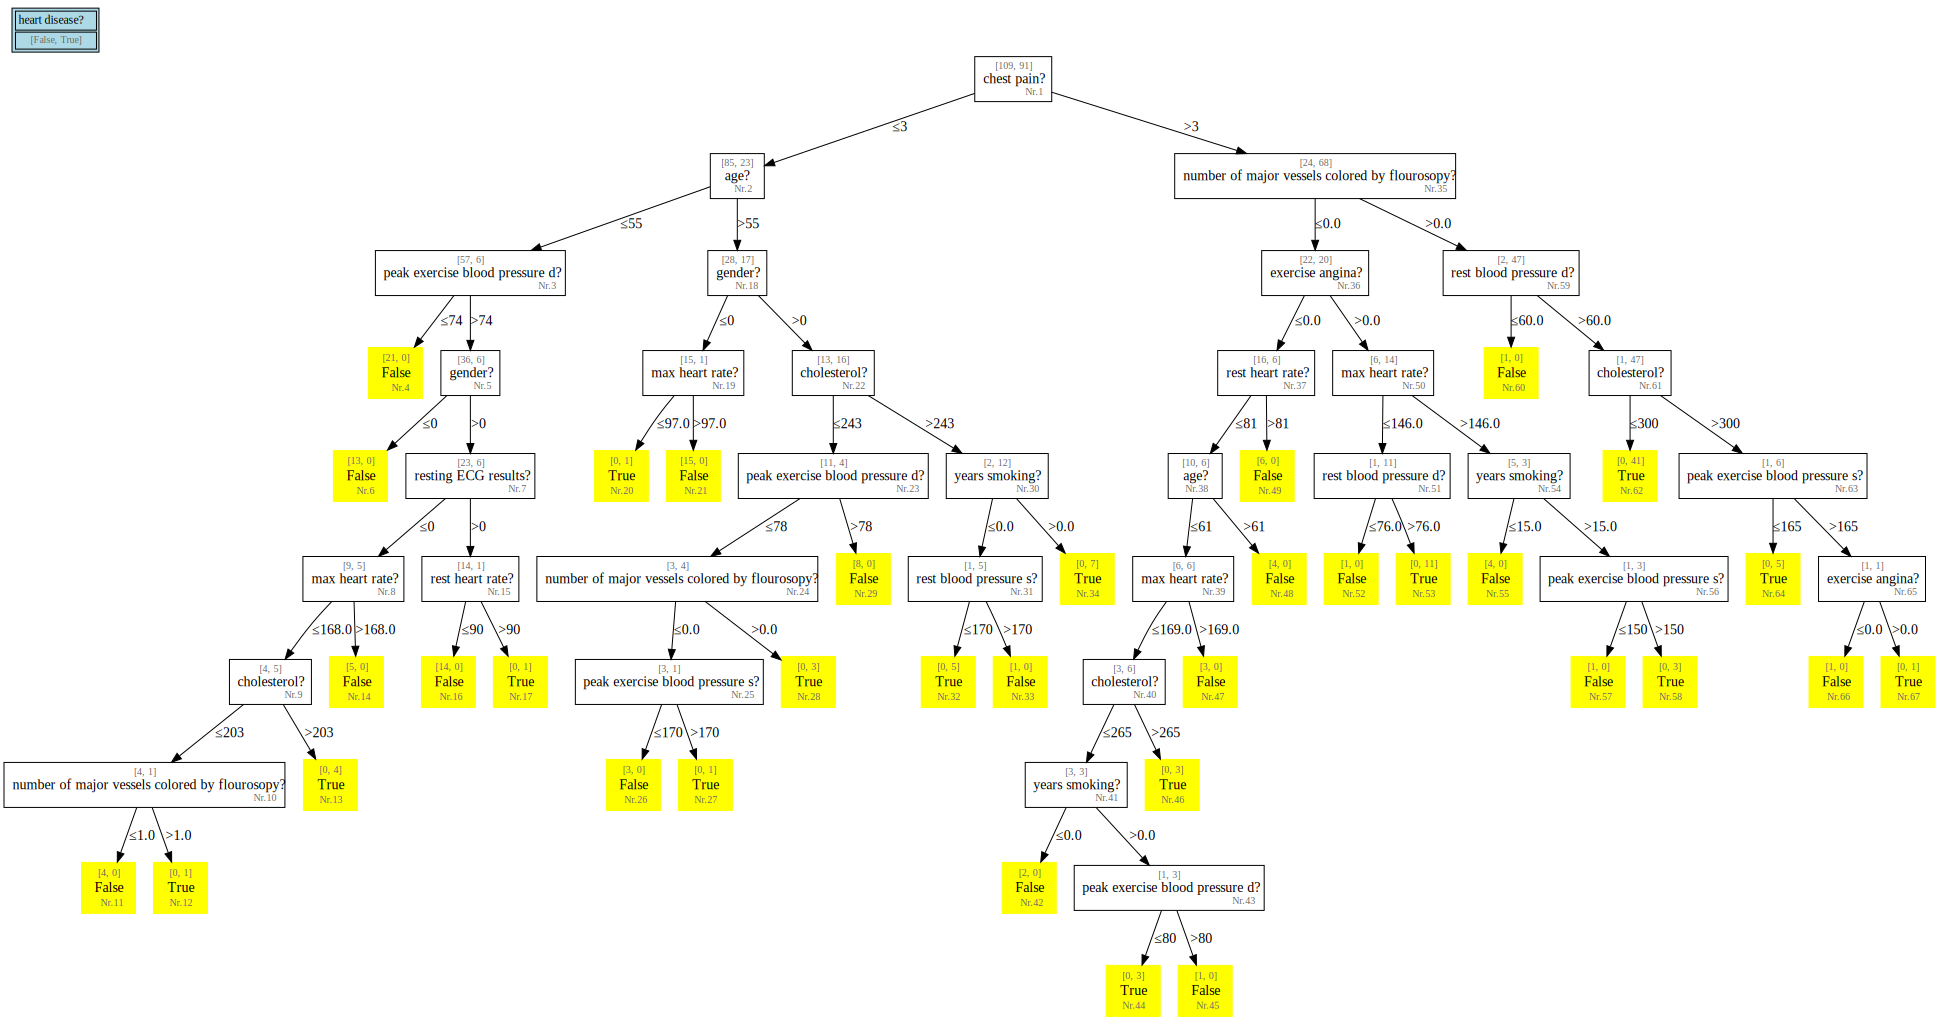

In [65]:
tree5 = ct.DecisionTree(data=df_pr_cleve_red2[:200],target='heart disease')
tree5.grow_tree()
tree5.print_tree()

In [66]:
tree5.prediction_accuracy(df_pr_cleve_red2[:200])

0.995

In [67]:
tree5.prediction_accuracy(df_pr_cleve_red2[200:])

0.7317073170731707

In [68]:
tree5.evaluation_depth(df_pr_cleve_red2[:200],df_pr_cleve_red2[200:]).iplot(xTitle='Tiefe des Baums', yTitle='Rate korrekter Klassifikationen')

In [69]:
tree5.validation_pruning(df_pr_cleve_red2[200:])

Test Node: 10
Prune Node: 10
Node-Count 65
New Test-Score 0.7317073170731707
Test Node: 9
Test Node: 8
Prune Node: 8
Node-Count 61
New Test-Score 0.7439024390243902
Test Node: 15
Prune Node: 15
Node-Count 59
New Test-Score 0.7439024390243902
Test Node: 7
Prune Node: 7
Node-Count 57
New Test-Score 0.7439024390243902
Test Node: 5
Prune Node: 5
Node-Count 55
New Test-Score 0.7439024390243902
Test Node: 3
Prune Node: 3
Node-Count 53
New Test-Score 0.7439024390243902
Test Node: 19
Prune Node: 19
Node-Count 51
New Test-Score 0.7560975609756098
Test Node: 25
Prune Node: 25
Node-Count 49
New Test-Score 0.7682926829268293
Test Node: 24
Test Node: 23
Test Node: 31
Prune Node: 31
Node-Count 47
New Test-Score 0.7682926829268293
Test Node: 30
Prune Node: 30
Node-Count 45
New Test-Score 0.7682926829268293
Test Node: 22
Test Node: 18
Test Node: 2
Test Node: 43
Prune Node: 43
Node-Count 43
New Test-Score 0.7682926829268293
Test Node: 41
Prune Node: 41
Node-Count 41
New Test-Score 0.8048780487804879
Te

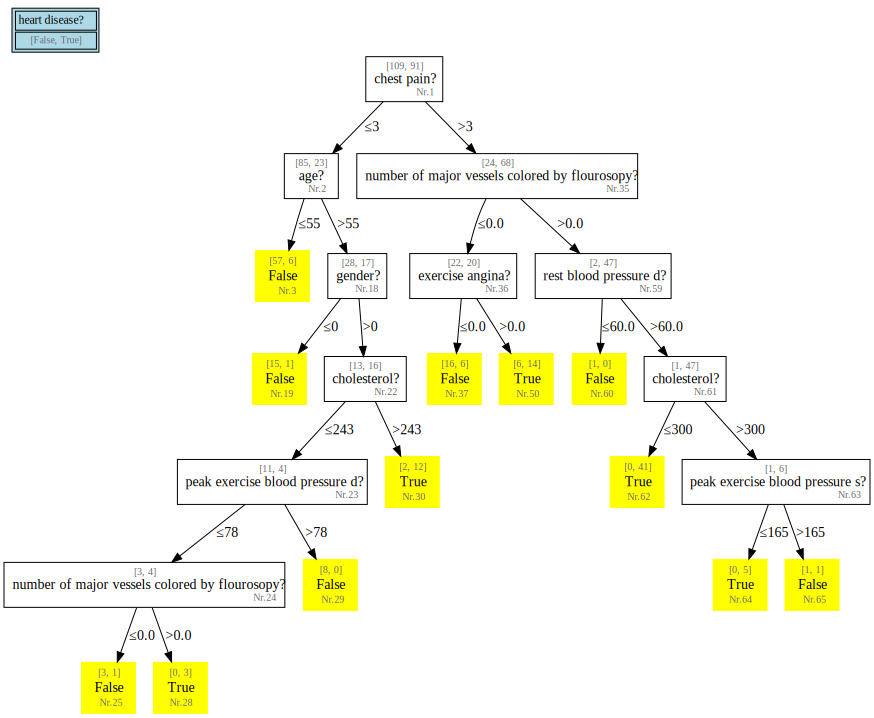

In [70]:
tree5.print_tree()

In [71]:
df_pr_cleve_red2.groupby(['heart disease','chest pain'], axis=0).count()

age  gender  rest blood pressure s  cholesterol  \
heart disease chest pain                                                    
False         1            16      16                     16           16   
              2            35      35                     35           35   
              3            67      67                     67           67   
              4            39      39                     39           39   
True          1             6       6                      6            6   
              2             8       8                      8            8   
              3            17      17                     17           17   
              4            94      94                     94           94   

                          smoke  cigs a day  years smoking  \
heart disease chest pain                                     
False         1              16          14             15   
              2              35          35             35   
              3              67          67             66   
              4              39          38             38   
True          1               6           6              6   
              2               8           8              8   
              3              17          16             16   
              4              94          93             93   

                          fasting blood sugar  family history  \
heart disease chest pain                                        
False         1                            16              16   
              2                            35              35   
              3                            67              67   
              4                            39              39   
True          1                             6               6   
              2                             8               8   
              3                            17              17   
              4                            94              94   

                          resting ECG results  max heart rate  \
heart disease chest pain                                        
False         1                            16              16   
              2                            35              35   
              3                            67              67   
              4                            39              39   
True          1                             6               6   
              2                             8               8   
              3                            17              17   
              4                            94              94   

                          rest heart rate  peak exercise blood pressure s  \
heart disease chest pain                                                    
False         1                        16                              16   
              2                        35                              35   
              3                        67                              67   
              4                        39                              39   
True          1                         6                               6   
              2                         8                               8   
              3                        17                              17   
              4                        94                              94   

                          peak exercise blood pressure d  \
heart disease chest pain                                   
False         1                                       16   
              2                                       35   
              3                                       67   
              4                                       39   
True          1                                        6   
              2                                        8   
              3                                       17   
              4      

In [74]:
tree5.tree_graph.view()

'Tree_heart disease.pdf'

In [76]:
tree5.prediction_accuracy(df_pr_cleve_red2[:200])

0.885

In [79]:
tree5.prediction_accuracy(df_pr_cleve_red2[120:])

0.845679012345679

In [80]:
tree5.validation_pruning(df_pr_cleve_red2[200:])

Test Node: 24
Test Node: 23
Test Node: 22
Test Node: 18
Test Node: 2
Test Node: 36
Test Node: 63
Test Node: 61
Test Node: 59
Test Node: 35
Test Node: 1
